 ### **The goal of the project is to analyze whether the particular URL is prone to phishing (malicious) or not**
  We are going to do 
1) Exploratory Data Analysis
2) Finding correlation of features and feature selection and
3) Building a classification model that classifies whether the URL sample is a phishing site or not


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('always') 

### **Exploratory Data Analysis**


In [3]:
# df = pd.read_csv("Cyber_Security_Dataset.csv")
# df.shape
# %pip install SQLAlchemy
from sqlalchemy import create_engine


host= 'localhost'
database = 'CyberSecurity_dataset'
user = 'postgres'
password = 'amma'
port = 5432 

conn = create_engine(f"postgresql://{user}:{password}@{host}:{port}/{database}")

sql = "select * from cyber_security limit 10"
df = pd.read_sql(sql,conn)


In [13]:
df.head(5)

,id,having_iphaving_ip_address,urlurl_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registeration_length,...,popupwidnow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [7]:
# Dropping the first column 'index'
df = df.iloc[:,1:]
df

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [8]:
df.isnull().sum().sum()

0

In [8]:
df.nunique()

having_IPhaving_IP_Address     2
URLURL_Length                  3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  2
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    2
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            3
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  2
DNSRecord                      2
web_traffic                    3
Page_Rank                      2
Google_Index                   2
Links_pointing_to_page         3
Statistical_report             2
Result    

In [9]:
# Duplicate check
df1 = df.T.duplicated().sum()
df1

0

### **Plot histogram and heat map for data exploration**

<Axes: >

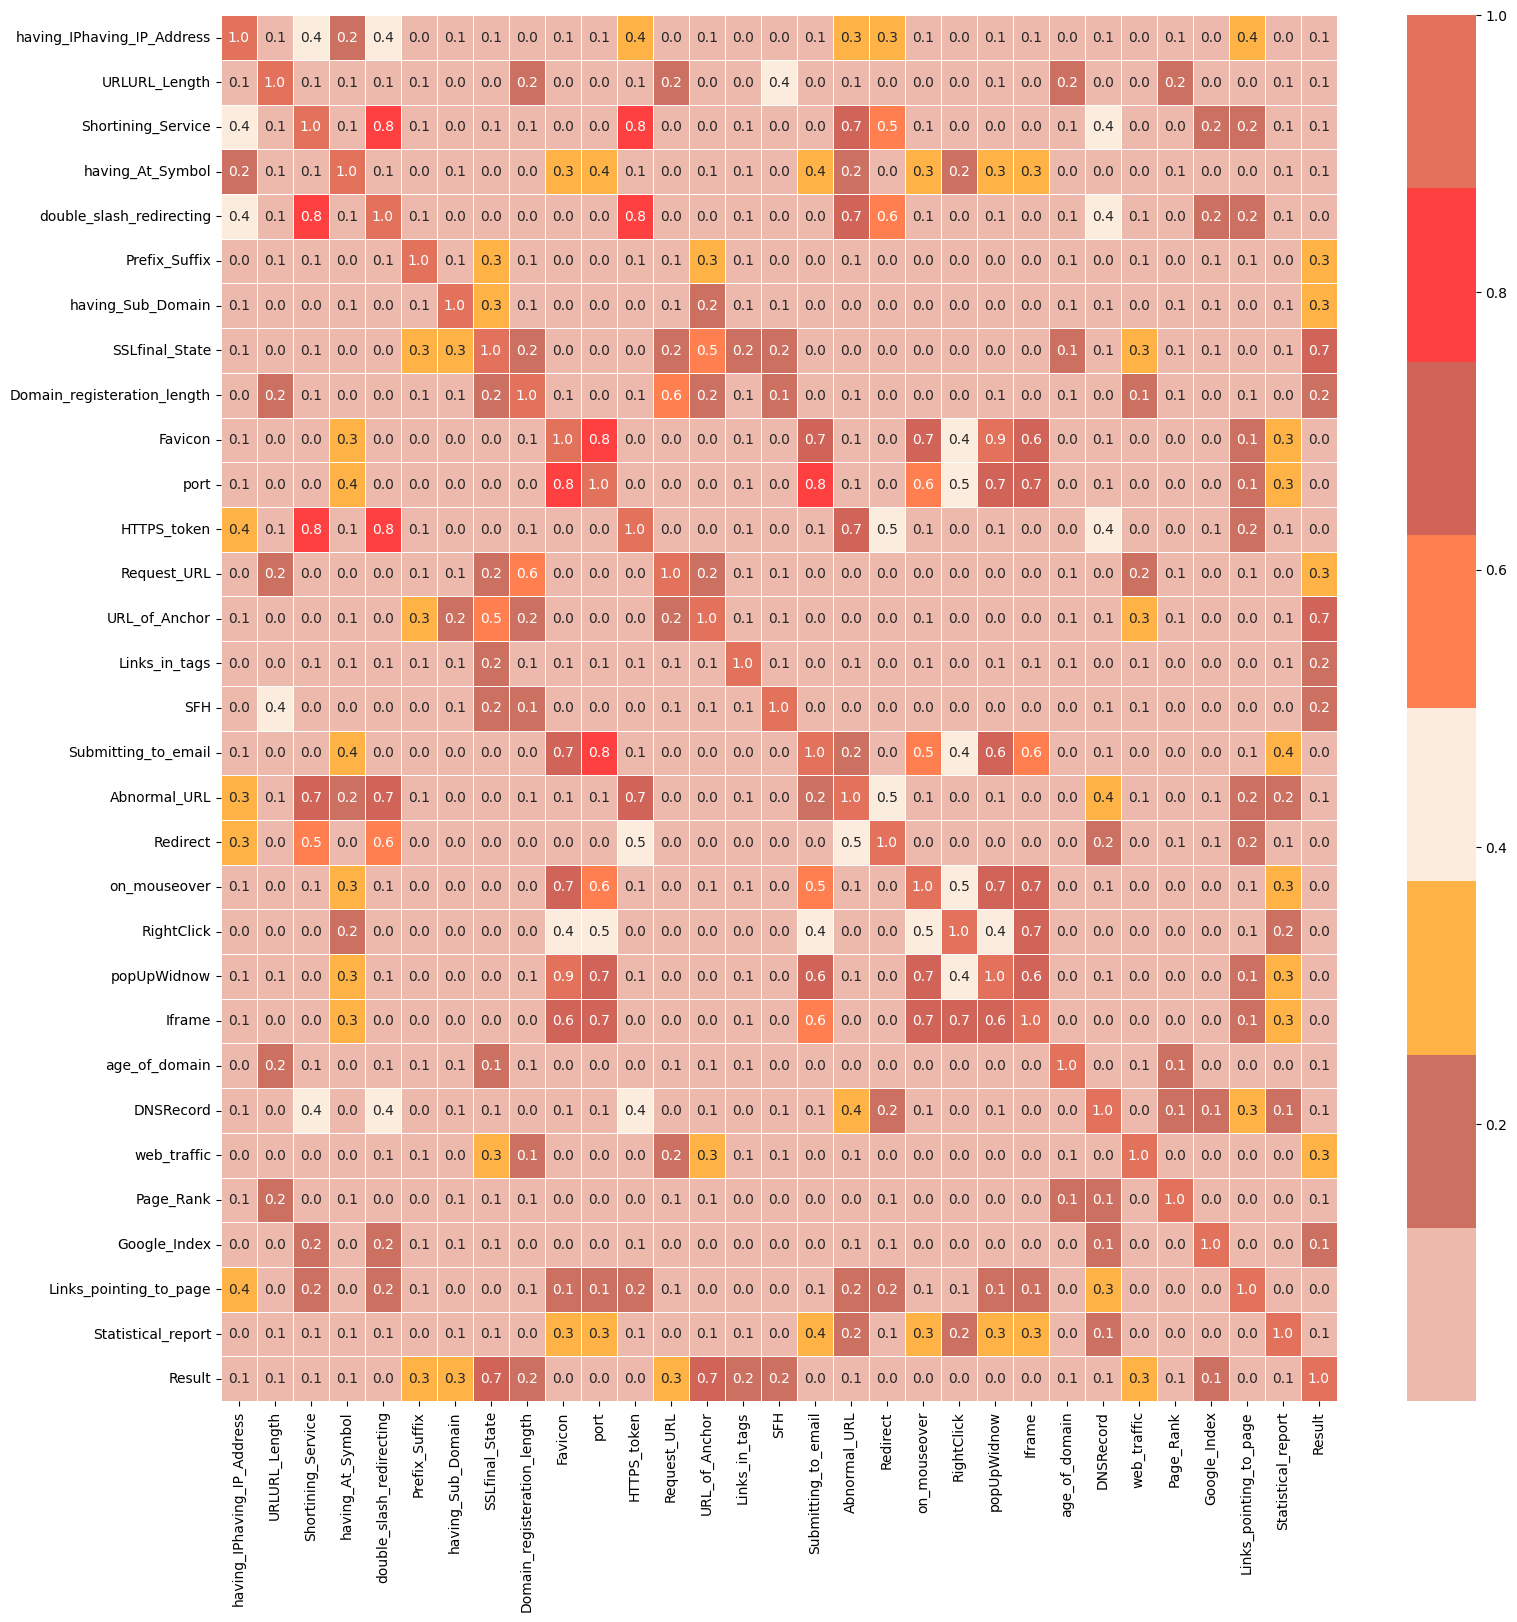

In [10]:
correlation = df.corr(method ='kendall').abs()
fig,axes=plt.subplots(figsize=(18,18))
custom_palette = sns.color_palette(["#EDB9AD", "#CC7161","#FFB347","#FBECDE","#FF7F50","#D16459","#FF4040","#E2725B"])
sns.heatmap(correlation,annot=True, linewidths=.5, fmt='.1f',ax=axes, cmap=custom_palette)

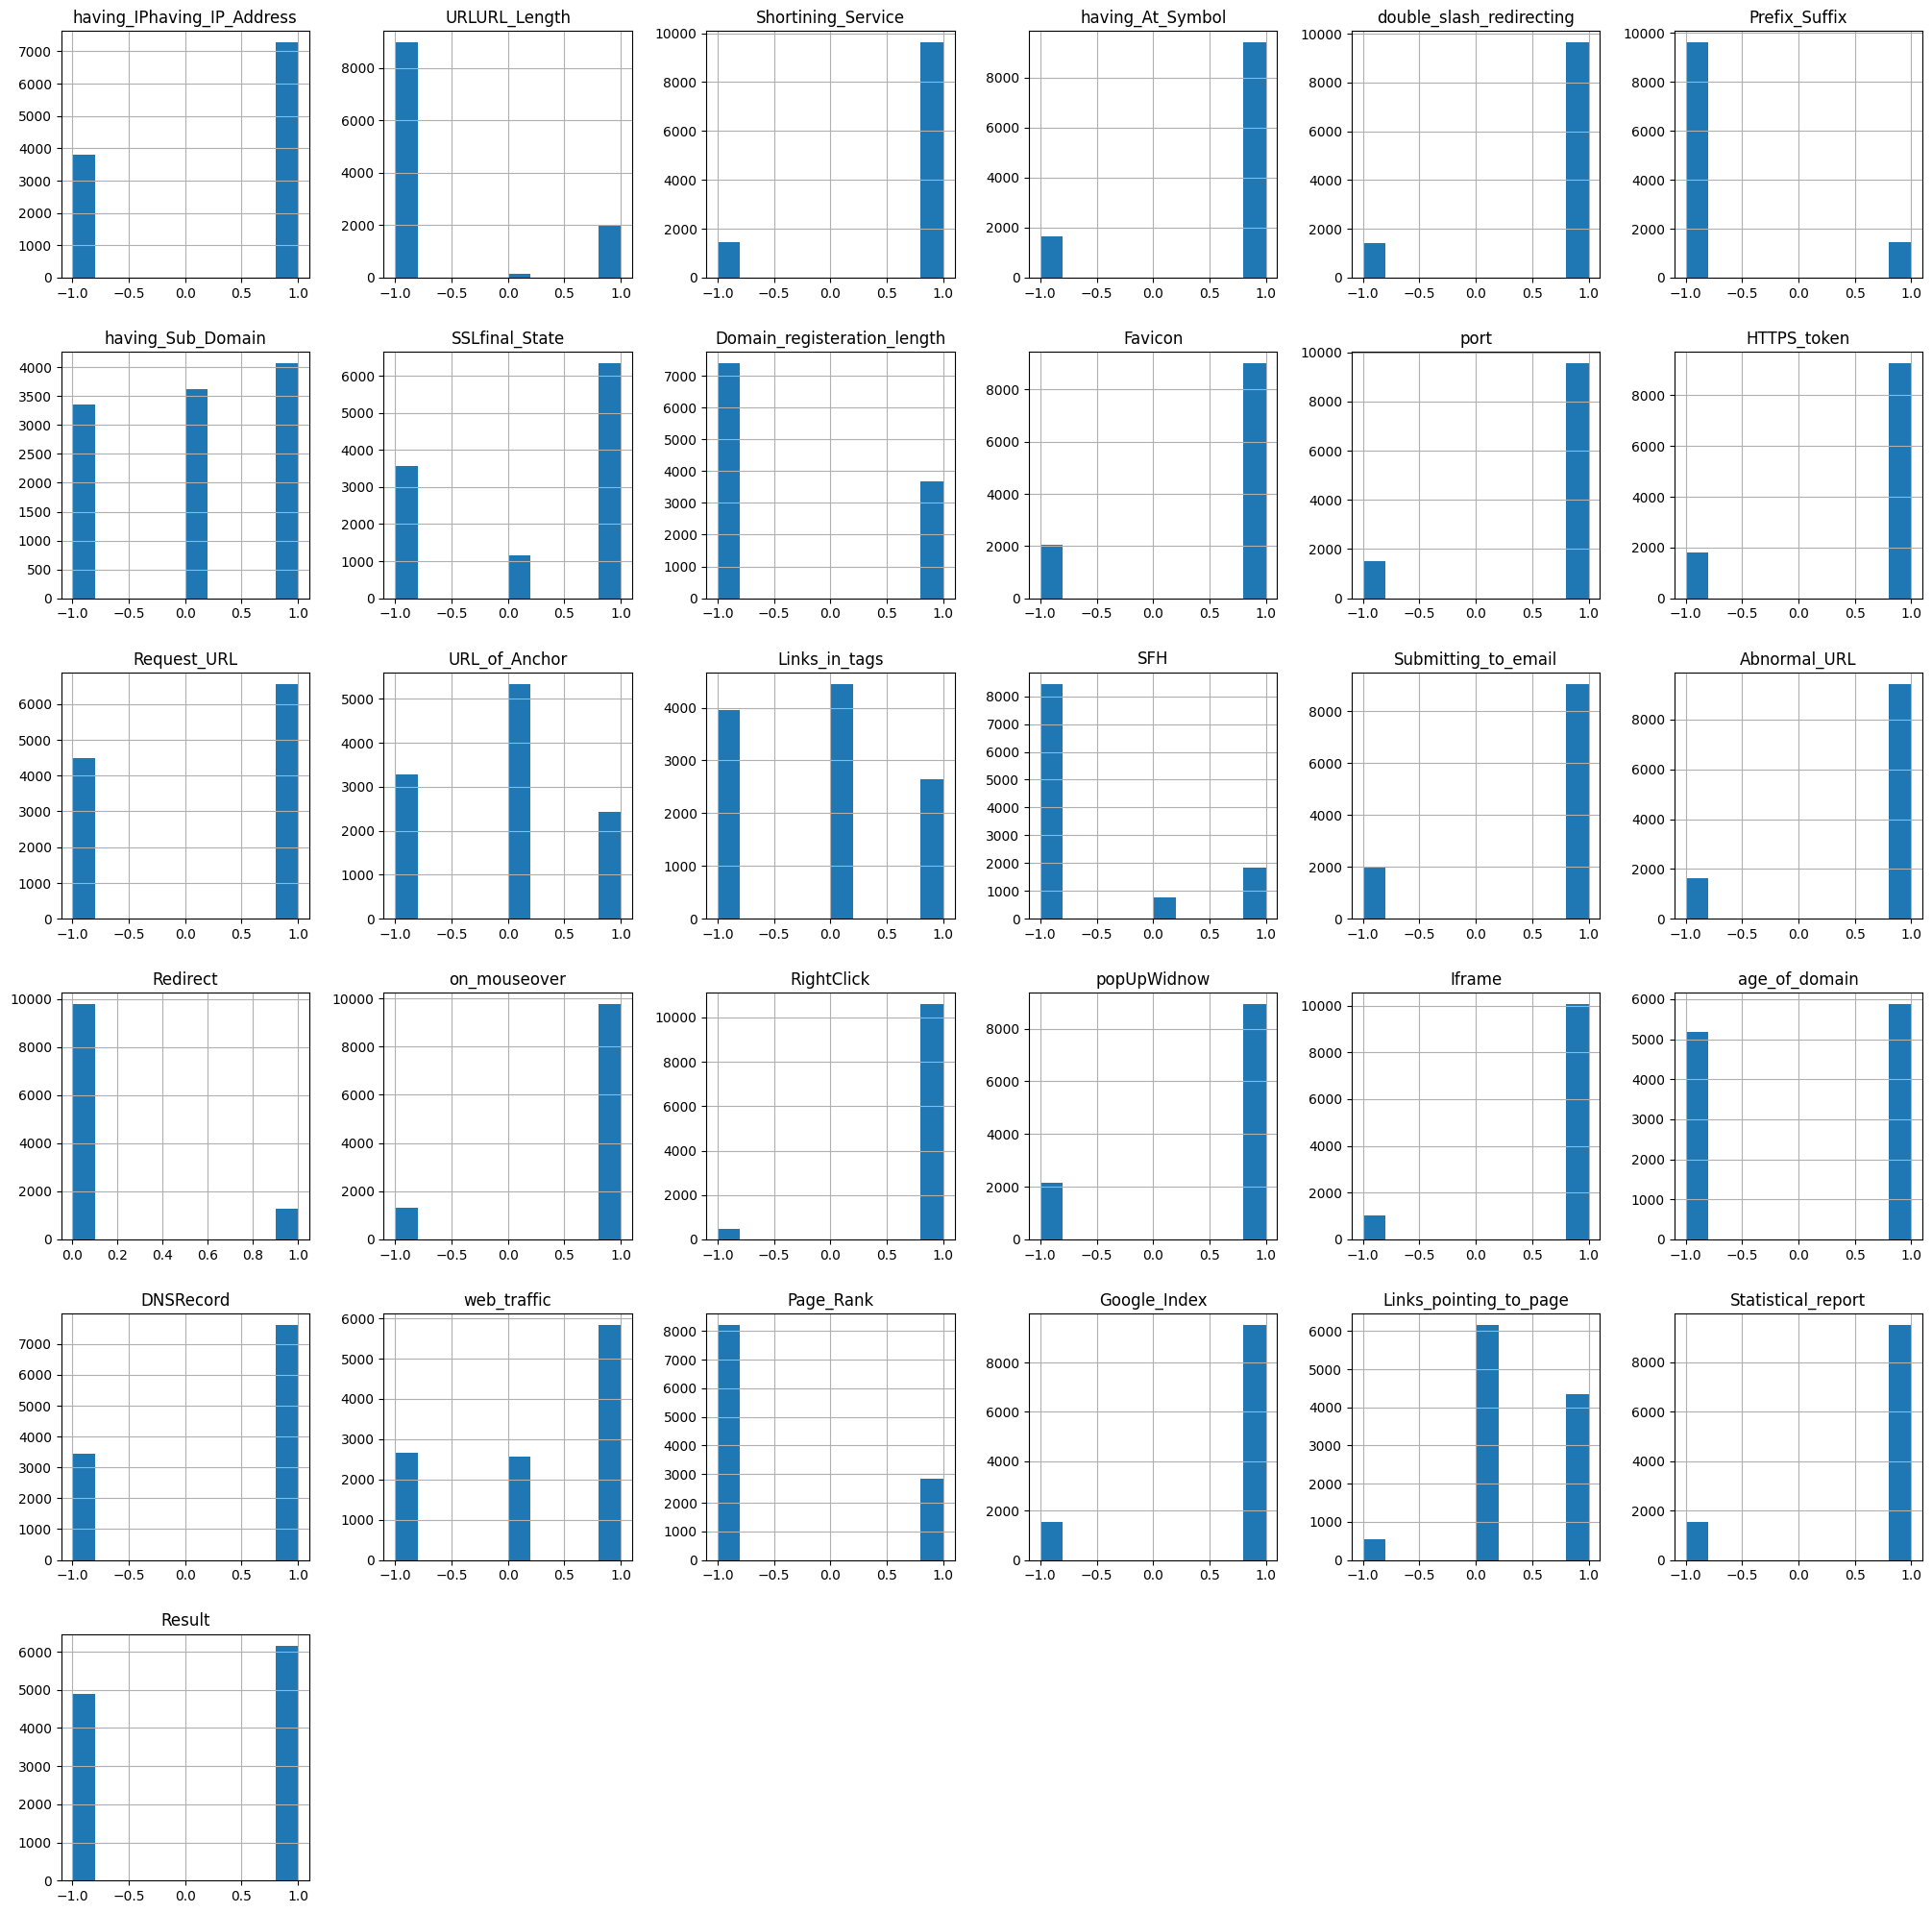

In [11]:
# plt.hist(df)
# plt.show()
df.hist(figsize=(25,25))
plt.show()

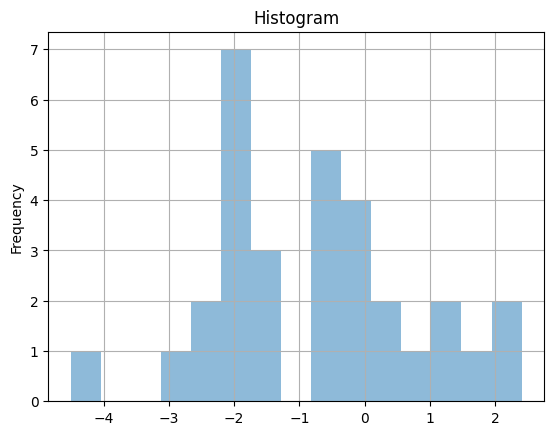

In [12]:
skew = df.skew()
# print(skew)
skew.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)
plt.title("Histogram")
plt.show()

In [13]:
upper_matrix = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(bool)).abs()
upper_matrix

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IPhaving_IP_Address,NaN,0.053273,0.403461,0.158699,0.397389,0.005257,0.074561,0.072563,0.022739,0.087025,...,0.096882,0.054694,0.010446,0.050733,0.004114,0.091774,0.029153,0.357947,0.019103,0.094160
URLURL_Length,NaN,NaN,0.103341,0.078623,0.078420,0.050444,0.001882,0.041379,0.215326,0.040989,...,0.050515,0.014259,0.174282,0.040880,0.010946,0.179977,0.002179,0.013308,0.070792,0.053030
Shortining_Service,NaN,NaN,NaN,0.104447,0.842796,0.080471,0.039416,0.058232,0.060923,0.006101,...,0.036616,0.016581,0.052596,0.436064,0.048744,0.014591,0.155844,0.217472,0.085461,0.067966
having_At_Symbol,NaN,NaN,NaN,NaN,0.086960,0.011726,0.055283,0.032900,0.015522,0.304899,...,0.290893,0.284410,0.005499,0.047872,0.028578,0.064735,0.037061,0.011616,0.080357,0.052948
double_slash_redirecting,NaN,NaN,NaN,NaN,NaN,0.085590,0.040512,0.034234,0.047464,0.035100,...,0.054463,0.010459,0.050107,0.431409,0.064260,0.003132,0.178415,0.214629,0.070390,0.038608
Prefix_Suffix,NaN,NaN,NaN,NaN,NaN,NaN,0.085433,0.259387,0.096799,0.007504,...,0.014733,0.036904,0.074116,0.016556,0.115133,0.006834,0.067781,0.074221,0.002763,0.348606
having_Sub_Domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.252066,0.079805,0.015617,...,0.023551,0.010108,0.116878,0.118355,0.000399,0.112336,0.054275,0.006628,0.078103,0.287377
SSLfinal_State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.190902,0.012692,...,0.010816,0.004946,0.144436,0.050691,0.255157,0.077577,0.093671,0.006524,0.062984,0.709670
Domain_registeration_length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.054253,...,0.051410,0.004393,0.062851,0.010477,0.126760,0.059898,0.039766,0.112024,0.002212,0.225789
Favicon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.939633,0.627607,0.002628,0.088211,0.043337,0.011699,0.016668,0.136394,0.300917,0.000280


In [14]:
to_drop = [column for column in upper_matrix.columns if any(upper_matrix[column]>0.75)]
to_drop

['double_slash_redirecting',
 'port',
 'HTTPS_token',
 'Submitting_to_email',
 'popUpWidnow']

In [15]:
df = df.drop(df[to_drop],axis = 1)
df

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,Request_URL,...,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,-1,0,1,-1,1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,-1,-1,-1,-1,1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,-1,-1,-1,1,1,-1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,-1,1,1,-1,1,1,...,1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,-1,-1,1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,1,-1,-1,-1,1,...,1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,-1,1,-1,-1,1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,-1,-1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,1,1,-1


In [16]:
# We are choosing x and y values. For x we exclude the 'Result' variable from df and choosing it for y 
x = df.iloc[:,:-1]
x= x.values
x

array([[-1,  1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  0,  1, ...,  1,  0, -1],
       ...,
       [ 1, -1,  1, ...,  1,  0,  1],
       [-1, -1,  1, ...,  1,  1,  1],
       [-1, -1,  1, ..., -1,  1, -1]], dtype=int64)

In [17]:
y = df.iloc[:,-1:]
# y= pd.DataFrame(y)
y = y.values
y


array([[-1],
       [-1],
       [-1],
       ...,
       [-1],
       [-1],
       [-1]], dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 43,shuffle=True)

### **Building Classification Model:**
 
1. Build classification models using a binary classifier to detect malicious or phishing URLs.  

2. Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.

In [19]:
from sklearn.preprocessing import StandardScaler 
  
std_scaler = StandardScaler() 
xtrain = std_scaler.fit_transform(x_train) 
xtest = std_scaler.transform(x_test) 
  
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8844, 25)
(2211, 25)
(8844, 1)
(2211, 1)


In [39]:
# !pip3 install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def classi_model(model_name,x_train,y_train,x_test,y_test):
    if model_name=='LogisticRegression':
        model = LogisticRegression()
        
    elif model_name=='KNeighborsClassifier':
        model = KNeighborsClassifier(n_neighbors=3)
        # x_test = x_test.values
        
    elif model_name=="XGBClassifier":
        model = XGBClassifier(objective='binary:logistic', eval_metric='auc')
        
        encoder = LabelEncoder()
        y_train = encoder.fit_transform(y_train)
        print(y_train)

        
    else:
        print("Not a valid model name")
        
    model.fit(x_train,y_train)
     
    # To calculate accuracy
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Accuracy = ", accuracy,"\n")
        
    #classification report
    print("Classification Report: ")
    report = classification_report(y_test,y_pred,zero_division=0)
    print(report)
        
    # To create heat map
    con_matrix = confusion_matrix(y_test,y_pred,labels=[-1,1])
    sns.heatmap(con_matrix,annot=True, fmt ='.2f')
    plt.suptitle('Confusion Matrix for '+model_name, x=0.44, y=1.0, ha='center', fontsize=15)
    plt.xlabel('Predict Values', fontsize =25)
    plt.ylabel('Test Values', fontsize =25)
    plt.show()        
        
    # To plot the ROC curve
    y_proba = model.predict_proba(x_test)
    fpr, tpr, threshold = roc_curve(y_test, y_proba[:,1],pos_label=1)
    # plt.plot(fpr,tpr)
    # plt.ylabel('True Positive Rate')
    # plt.xlabel('False Positive Rate')
    # plt.show()

    return model,accuracy,fpr, tpr, threshold
        
  

### **LogisticRegression Model**

Accuracy =  0.9258254183627318 

Classification Report: 
              precision    recall  f1-score   support

          -1       0.93      0.91      0.92      1016
           1       0.92      0.94      0.93      1195

    accuracy                           0.93      2211
   macro avg       0.93      0.92      0.93      2211
weighted avg       0.93      0.93      0.93      2211



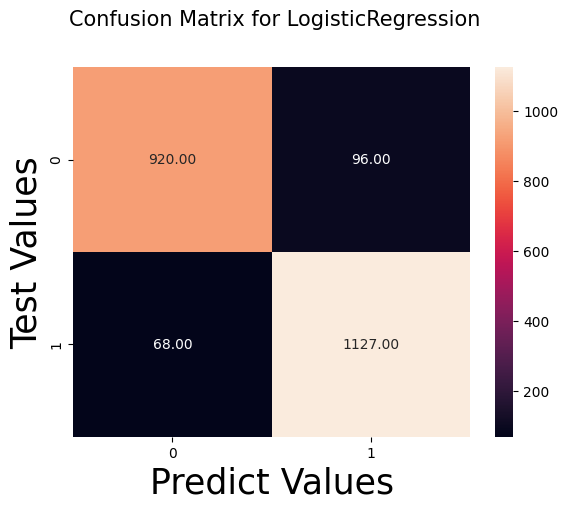

In [23]:
logistic_model,acc1, fpr1, tpr1, thresh1 = classi_model("LogisticRegression", x_train,y_train.ravel(),x_test,y_test)


### **KNeighborsClassifier Model**

Accuracy =  0.9497964721845319 

Classification Report: 
              precision    recall  f1-score   support

          -1       0.95      0.94      0.94      1016
           1       0.95      0.96      0.95      1195

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



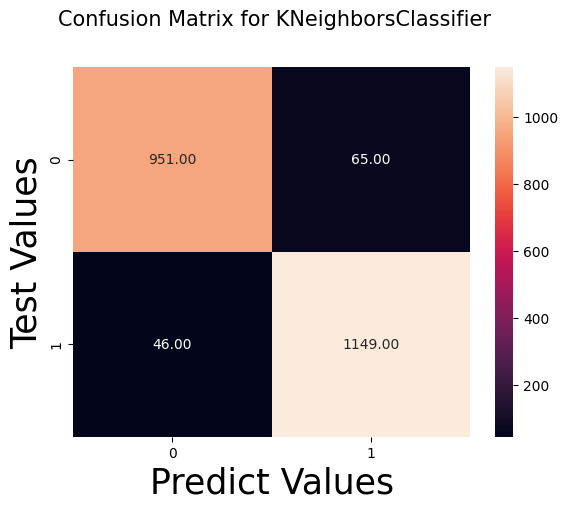

In [24]:
knn_model,acc2,fpr2,tpr2,thresh2 = classi_model("KNeighborsClassifier",x_train,y_train.ravel(),x_test, y_test)

### **XGBClassifer Model**

[0 0 0 ... 0 1 0]
Accuracy =  0.5278154681139756 

Classification Report: 
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1016
           0       0.00      0.00      0.00         0
           1       0.97      0.98      0.97      1195

    accuracy                           0.53      2211
   macro avg       0.32      0.33      0.32      2211
weighted avg       0.52      0.53      0.53      2211



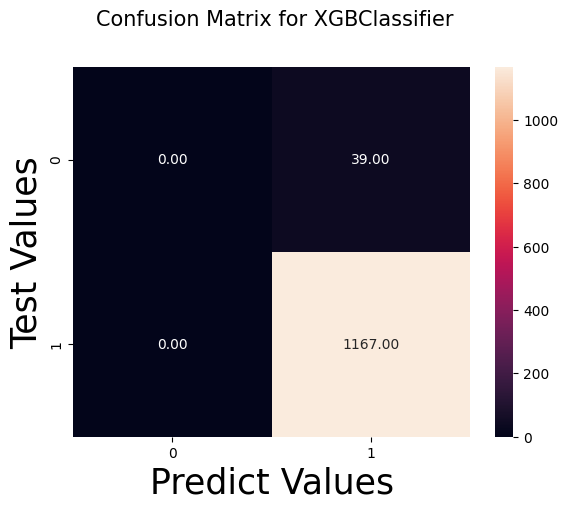

In [25]:
xb_model,acc3,fpr3,tpr3,thresh3 = classi_model("XGBClassifier",x_train,y_train.ravel(),x_test, y_test)

#### **Plot ROC curve**

In [26]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

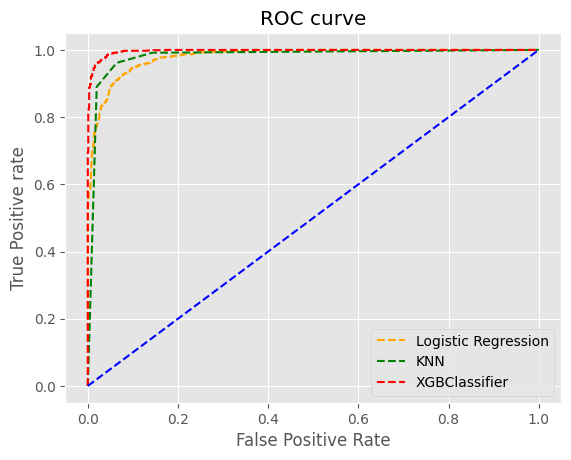

In [31]:
# !pip install seaborn
# plt.style.use('seaborn')
plt.style.use('ggplot')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='XGBClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()
# print(plt.style.available)


#### ROC plot shows XGBClassifier True Positive rate is higher than the other models.

### **Validate the accuracy of data by the K-Fold cross-validation technique.**

#### Logistic Regression Optimization - parameter tuning using GridSearchCV

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.model_selection import GridSearchCV, StratifiedKFold



import warnings
warnings.filterwarnings("ignore")

# Create the parameter grid based on the results of random search
param_grid = {
    'solver':['liblinear','newton-cg'],
    'C': [0.01,0.1,1,10,100],
    'penalty': ["l1","l2"]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = LogisticRegression() , param_grid = param_grid,
cv = StratifiedKFold(4), n_jobs = -1, verbose = 1, scoring = 'accuracy' )

grid_search.fit(x_train,y_train.ravel())

Fitting 4 folds for each of 20 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg']},
             scoring='accuracy', verbose=1)

In [33]:
print('Best Parameter:')
print('F1 Score:', grid_search.best_score_)
print('Best Hyperparameters:', grid_search.best_params_)
print('Model object with best parameters:')
print(grid_search.best_estimator_)

Best Parameter:
F1 Score: 0.9279737675260064
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Model object with best parameters:
LogisticRegression(C=0.1, solver='newton-cg')


#### K-Nearest Neighbors Hyperparameters Tuning using GridSearchCV

In [34]:
grid_params = {
    'n_neighbors':[3,4,11,19],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}
gs= GridSearchCV(
KNeighborsClassifier(),
grid_params,
verbose=1,
cv=3,
n_jobs=-1
)
gs_results = gs.fit(x_train,y_train.ravel())

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [35]:
print('Best Parameter:')
print('F1 Score:', gs_results.best_score_)
print('Best Hyperparameters:', gs_results.best_params_)
print('Model object with best parameters:')
print(gs_results.best_estimator_)

Best Parameter:
F1 Score: 0.9588421528720036
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Model object with best parameters:
KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')


#### XGBClassifier with kfold cross validation

In [78]:
# import sklearn
# import xgboost
# from xgboost import XGBClassifier

# encoder = LabelEncoder()
# y_train = encoder.fit_transform(y_train)

# xgb_cv = XGBClassifier(n_estimators=100,objective='binary:logistic',eval_metric='auc')
# xgb_cv = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss")
# scores = cross_val_score(xgb_cv, x_train, y_train.ravel(), cv=10, scoring = "accuracy")
# print("Scores:", scores)
# print("Mean:", scores.mean())
# print("Standard Deviation:", scores.std())

# Convert data if needed
# dtrain = DMatrix(x_train, label=y_train)

# # Define parameters
# params = {"objective": "binary:logistic", "eval_metric": "auc"}

# # Perform XGBoost's built-in CV
# cv_results = cv(params, dtrain, num_boost_round=100, nfold=10, stratified=True)

# print("CV Results:\n", cv_results)
# print(cv_results.iloc[-1])



### **The final output consists of the model, which will give maximum accuracy on the validation dataset with selected attributes.**

 

In [79]:

from xgboost import DMatrix, cv

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

# Convert data into DMatrix (XGBoost's optimized data structure)
dtrain = DMatrix(x_train, label=y_train)

# Define XGBoost parameters
params = {
    "objective": "binary:logistic",
    "eval_metric": "auc"
}

# Perform XGBoost's built-in cross-validation
cv_results = cv(
    params, 
    dtrain, 
    num_boost_round=100, 
    nfold=10, 
    stratified=True, 
    metrics="auc", 
    as_pandas=True
)

# Extract final mean AUC score from cross-validation
final_auc = cv_results["test-auc-mean"].iloc[-1]

# Create DataFrame with model results
results = pd.DataFrame({
    'Model': ['LogisticRegression', 'KNN', 'XGBoost'],
    'Accuracy Score': [grid_search.best_score_, gs_results.best_score_, final_auc]
})

# Sort results and set index
result_df = results.sort_values(by='Accuracy Score', ascending=False).set_index('Model')

# Print the results
print(result_df)

                    Accuracy Score
Model                             
XGBoost                   0.995896
KNN                       0.958842
LogisticRegression        0.927974


### **Conclusion**
The classification models are built using LogisticRegression,KNeighborsClassifier and XGBClassifier algorithms to detect malicious or phishing URLs. Among these classifiers XGBClassifier gives maximum accuracy on the validation dataset with selected attributes.